In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from collections import Counter
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [10]:
import nltk

In [11]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
# Load the data
df = pd.read_csv("dataset_3.csv")
df.head()

,Title,Abstract,First Claim,Target
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning


In [13]:
df.info()  #checking if there is any inconsistency in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
Title          200 non-null object
Abstract       200 non-null object
First Claim    200 non-null object
Target         200 non-null object
dtypes: object(4)
memory usage: 6.4+ KB


In [14]:
df.shape #For checking the shape of the data

(200, 4)

In [15]:
Counter(df.Target) #To count the number of target

Counter({'Deep learning': 50,
         'Nucleic acid(DNA)': 50,
         'Light emitting diode': 50,
         'Polymer': 50})

In [16]:
df.isnull().sum().to_frame() # To check for the null values in the data

,0
Title,0
Abstract,0
First Claim,0
Target,0


In [17]:
df.columns

Index(['Title', 'Abstract', 'First Claim', 'Target'], dtype='object')

In [18]:
print(df['Target'].unique())

['Deep learning' 'Nucleic acid(DNA)' 'Light emitting diode' 'Polymer']


In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [21]:
#Function to remove Punctuation
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])# It will discard all punctuations
    return text_nopunct

df['Title_clean'] = df['Title'].apply(lambda x: remove_punct(x))
df['Abstract_clean'] = df['Abstract'].apply(lambda x: remove_punct(x))
df['First Claim_clean'] = df['First Claim'].apply(lambda x: remove_punct(x))
df.head()

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...


In [23]:
import re

# Function to Tokenize words
def tokenize(text):
    tokens = re.split('\W+', text) #W+ means that either a word character (A-Za-z0-9_) or a dash (-) can go there.
    return tokens
 
df['Title_tokenized'] = df['Title_clean'].apply(lambda x: tokenize(x.lower()))
df['Abstract_tokenized'] = df['Abstract_clean'].apply(lambda x: tokenize(x.lower())) 
df['First Claim_tokenized'] = df['First Claim_clean'].apply(lambda x: tokenize(x.lower()))
#We convert to lower as Python is case-sensitive. 

df.head()

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,First Claim_tokenized
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"[geophysical, deep, learning]","[a, method, can, include, selecting, a, type, ...","[1, a, method, comprising, selecting, a, type,..."
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"[deep, learning, for, algorithm, portfolios]","[automated, feature, construction, for, algori...","[1, a, computerimplemented, method, of, automa..."
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"[modular, deep, learning, model]","[the, technology, described, herein, uses, a, ...","[1, an, automatic, speech, recognition, asr, s..."
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"[deep, learning, processing, of, video]","[a, method, and, system, for, processing, mult...","[1, a, method, comprising, performing, a, firs..."
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"[system, and, method, for, deep, learning, and...","[a, neural, network, is, trained, using, deep,...","[1, a, method, comprising, initializing, a, ne..."


In [24]:
import nltk

stopword = nltk.corpus.stopwords.words('english')# All English Stopwords

In [25]:
# Function to remove Stopwords
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopword]# To remove all stopwords
    return text

df['Title_nostopwords'] = df['Title_tokenized'].apply(lambda x: remove_stopwords(x))
df['Abstract_nostopwords'] = df['Abstract_tokenized'].apply(lambda x: remove_stopwords(x))
df['First Claim_nostopwords'] = df['First Claim_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,First Claim_tokenized,Title_nostopwords,Abstract_nostopwords,First Claim_nostopwords
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"[geophysical, deep, learning]","[a, method, can, include, selecting, a, type, ...","[1, a, method, comprising, selecting, a, type,...","[geophysical, deep, learning]","[method, include, selecting, type, geophysical...","[1, method, comprising, selecting, type, geoph..."
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"[deep, learning, for, algorithm, portfolios]","[automated, feature, construction, for, algori...","[1, a, computerimplemented, method, of, automa...","[deep, learning, algorithm, portfolios]","[automated, feature, construction, algorithm, ...","[1, computerimplemented, method, automated, fe..."
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"[modular, deep, learning, model]","[the, technology, described, herein, uses, a, ...","[1, an, automatic, speech, recognition, asr, s...","[modular, deep, learning, model]","[technology, described, herein, uses, modular,...","[1, automatic, speech, recognition, asr, syste..."
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"[deep, learning, processing, of, video]","[a, method, and, system, for, processing, mult...","[1, a, method, comprising, performing, a, firs...","[deep, learning, processing, video]","[method, system, processing, multiple, frames,...","[1, method, comprising, performing, first, pro..."
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"[system, and, method, for, deep, learning, and...","[a, neural, network, is, trained, using, deep,...","[1, a, method, comprising, initializing, a, ne...","[system, method, deep, learning, wireless, net...","[neural, network, trained, using, deep, reinfo...","[1, method, comprising, initializing, neural, ..."


In [26]:
ps = nltk.PorterStemmer()

def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['Title_stemmed'] = df['Title_nostopwords'].apply(lambda x: stemming(x))
df['Abstract_stemmed'] = df['Abstract_nostopwords'].apply(lambda x: stemming(x))
df['First Claim_stemmed'] = df['First Claim_nostopwords'].apply(lambda x: stemming(x))

df.head()

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,First Claim_tokenized,Title_nostopwords,Abstract_nostopwords,First Claim_nostopwords,Title_stemmed,Abstract_stemmed,First Claim_stemmed
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"[geophysical, deep, learning]","[a, method, can, include, selecting, a, type, ...","[1, a, method, comprising, selecting, a, type,...","[geophysical, deep, learning]","[method, include, selecting, type, geophysical...","[1, method, comprising, selecting, type, geoph...","[geophys, deep, learn]","[method, includ, select, type, geophys, data, ...","[1, method, compris, select, type, geophys, da..."
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"[deep, learning, for, algorithm, portfolios]","[automated, feature, construction, for, algori...","[1, a, computerimplemented, method, of, automa...","[deep, learning, algorithm, portfolios]","[automated, feature, construction, algorithm, ...","[1, computerimplemented, method, automated, fe...","[deep, learn, algorithm, portfolio]","[autom, featur, construct, algorithm, portfoli...","[1, computerimpl, method, autom, featur, const..."
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"[modular, deep, learning, model]","[the, technology, described, herein, uses, a, ...","[1, an, automatic, speech, recognition, asr, s...","[modular, deep, learning, model]","[technology, described, herein, uses, modular,...","[1, automatic, speech, recognition, asr, syste...","[modular, deep, learn, model]","[technolog, describ, herein, use, modular, mod...","[1, automat, speech, recognit, asr, system, ma..."
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"[deep, learning, processing, of, video]","[a, method, and, system, for, processing, mult...","[1, a, method, comprising, performing, a, firs...","[deep, learning, processing, video]","[method, system, processing, multiple, frames,...","[1, method, comprising, performing, first, pro...","[deep, learn, process, video]","[method, system, process, multipl, frame, vide...","[1, method, compris, perform, first, process, ..."
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"[system, and, method, for, deep, learning, and...","[a, neural, network, is, trained, using, deep,...","[1, a, method, comprising, initializing, a, ne...","[system, method, deep, learning, wireless, net...","[neural, network, trained, using, deep, reinfo...","[1, method, comprising, initializing, neural, ...","[system, method, deep, learn, wireless, networ...","[neural, network, train, use, deep, reinforc, ...","[1, method, compris, initi, neural, network, s..."


In [27]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\uday
[nltk_data]     kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
from nltk import WordNetLemmatizer

wn = nltk.WordNetLemmatizer()

def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['Title_lemmatized'] = df['Title_nostopwords'].apply(lambda x: lemmatizing(x))
df['Abstract_lemmatized'] = df['Abstract_nostopwords'].apply(lambda x: lemmatizing(x))
df['First Claim_lemmatized'] = df['First Claim_nostopwords'].apply(lambda x: lemmatizing(x))

df.head(5)

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,First Claim_tokenized,Title_nostopwords,Abstract_nostopwords,First Claim_nostopwords,Title_stemmed,Abstract_stemmed,First Claim_stemmed,Title_lemmatized,Abstract_lemmatized,First Claim_lemmatized
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"[geophysical, deep, learning]","[a, method, can, include, selecting, a, type, ...","[1, a, method, comprising, selecting, a, type,...","[geophysical, deep, learning]","[method, include, selecting, type, geophysical...","[1, method, comprising, selecting, type, geoph...","[geophys, deep, learn]","[method, includ, select, type, geophys, data, ...","[1, method, compris, select, type, geophys, da...","[geophysical, deep, learning]","[method, include, selecting, type, geophysical...","[1, method, comprising, selecting, type, geoph..."
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"[deep, learning, for, algorithm, portfolios]","[automated, feature, construction, for, algori...","[1, a, computerimplemented, method, of, automa...","[deep, learning, algorithm, portfolios]","[automated, feature, construction, algorithm, ...","[1, computerimplemented, method, automated, fe...","[deep, learn, algorithm, portfolio]","[autom, featur, construct, algorithm, portfoli...","[1, computerimpl, method, autom, featur, const...","[deep, learning, algorithm, portfolio]","[automated, feature, construction, algorithm, ...","[1, computerimplemented, method, automated, fe..."
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"[modular, deep, learning, model]","[the, technology, described, herein, uses, a, ...","[1, an, automatic, speech, recognition, asr, s...","[modular, deep, learning, model]","[technology, described, herein, uses, modular,...","[1, automatic, speech, recognition, asr, syste...","[modular, deep, learn, model]","[technolog, describ, herein, use, modular, mod...","[1, automat, speech, recognit, asr, system, ma...","[modular, deep, learning, model]","[technology, described, herein, us, modular, m...","[1, automatic, speech, recognition, asr, syste..."
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"[deep, learning, processing, of, video]","[a, method, and, system, for, processing, mult...","[1, a, method, comprising, performing, a, firs...","[deep, learning, processing, video]","[method, system, processing, multiple, frames,...","[1, method, comprising, performing, first, pro...","[deep, learn, process, video]","[method, system, process, multipl, frame, vide...","[1, method, compris, perform, first, process, ...","[deep, learning, processing, video]","[method, system, processing, multiple, frame, ...","[1, method, comprising, performing, first, pro..."
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"[system, and, 

In [48]:
import string

# Function to calculate length of message excluding space
df['Title_len'] = df['Title'].apply(lambda x: len(x) - x.count(" "))
df['Abstract_len'] = df['Abstract'].apply(lambda x: len(x) - x.count(" "))
df['First Claim_len'] = df['First Claim'].apply(lambda x: len(x) - x.count(" "))

df.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['punct%_Title'] = df['Title'].apply(lambda x: count_punct(x))
df['punct%_Abstract'] = df['Abstract'].apply(lambda x: count_punct(x))
df['punct%_First Claim'] = df['First Claim'].apply(lambda x: count_punct(x))

df.head()

,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,First Claim_tokenized,...,First Claim_stemmed,Title_lemmatized,Abstract_lemmatized,First Claim_lemmatized,Title_len,Abstract_len,First Claim_len,punct%_Title,punct%_Abstract,punct%_First Claim
0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"[geophysical, deep, learning]","[a, method, can, include, selecting, a, type, ...","[1, a, method, comprising, selecting, a, type,...",...,"[1, method, compris, select, type, geophys, da...","[geophysical, deep, learning]","[method, include, selecting, type, geophysical...","[1, method, comprising, selecting, type, geoph...",23,457,641,0.0,1.5,1.6
1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"[deep, learning, for, algorithm, portfolios]","[automated, feature, construction, for, algori...","[1, a, computerimplemented, method, of, automa...",...,"[1, computerimpl, method, autom, featur, const...","[deep, learning, algorithm, portfolio]","[automated, feature, construction, algorithm, ...","[1, computerimplemented, method, automated, fe...",34,627,1062,0.0,1.4,2.5
2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"[modular, deep, learning, model]","[the, technology, described, herein, uses, a, ...","[1, an, automatic, speech, recognition, asr, s...",...,"[1, automat, speech, recognit, asr, system, ma...","[modular, deep, learning, model]","[technology, described, herein, us, modular, m...","[1, automatic, speech, recognition, asr, syste...",24,586,1615,0.0,6.1,2.2
3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"[deep, learning, processing, of, video]","[a, method, and, system, for, processing, mult...","[1, a, method, comprising, performing, a, firs...",...,"[1, method, compris, perform, first, process, ...","[deep, learning, processing, video]","[method, system, processing, multiple, frame, ...","[1, method, comprising, performing, first, pro...",29,456,389,0.0,2.0,1.5
4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"[system, and, method, for, deep, learning, and...","[a, neural, network, is, trained, using, deep,...","[1, a, method, comprising, initializing, a, ne...",...,"[1, method, compris, initi, neural, network, s...","[system, method, deep, learning, wireless, net...","[neural, network, trained, using, deep, reinfo...","[1, method, comprising, initializing, neural, ...",77,609,1451,0.0,2.1,1.7


In [49]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.

df.to_csv("dataset_3_cleaned.csv", sep=',')

In [145]:
# Load the data
data = pd.read_csv("dataset_3_cleaned.csv")
data.head()

,Unnamed: 0,Title,Abstract,First Claim,Target,Title_clean,Abstract_clean,First Claim_clean,Title_tokenized,Abstract_tokenized,...,First Claim_stemmed,Title_lemmatized,Abstract_lemmatized,First Claim_lemmatized,Title_len,Abstract_len,First Claim_len,punct%_Title,punct%_Abstract,punct%_First Claim
0,0,Geophysical deep learning,A method can include selecting a type of geoph...,1. A method comprising:\nselecting a type of g...,Deep learning,Geophysical deep learning,A method can include selecting a type of geoph...,1 A method comprising\nselecting a type of geo...,"['geophysical', 'deep', 'learning']","['a', 'method', 'can', 'include', 'selecting',...",...,"['1', 'method', 'compris', 'select', 'type', '...","['geophysical', 'deep', 'learning']","['method', 'include', 'selecting', 'type', 'ge...","['1', 'method', 'comprising', 'selecting', 'ty...",23,457,641,0.0,1.5,1.6
1,1,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1. A computer-implemented method of automated ...,Deep learning,Deep learning for algorithm portfolios,Automated feature construction for algorithm p...,1 A computerimplemented method of automated fe...,"['deep', 'learning', 'for', 'algorithm', 'port...","['automated', 'feature', 'construction', 'for'...",...,"['1', 'computerimpl', 'method', 'autom', 'feat...","['deep', 'learning', 'algorithm', 'portfolio']","['automated', 'feature', 'construction', 'algo...","['1', 'computerimplemented', 'method', 'automa...",34,627,1062,0.0,1.4,2.5
2,2,Modular deep learning model,The technology described herein uses a modular...,1. An automatic speech recognition (ASR) syste...,Deep learning,Modular deep learning model,The technology described herein uses a modular...,1 An automatic speech recognition ASR system f...,"['modular', 'deep', 'learning', 'model']","['the', 'technology', 'described', 'herein', '...",...,"['1', 'automat', 'speech', 'recognit', 'asr', ...","['modular', 'deep', 'learning', 'model']","['technology', 'described', 'herein', 'us', 'm...","['1', 'automatic', 'speech', 'recognition', 'a...",24,586,1615,0.0,6.1,2.2
3,3,Deep learning processing of video,A method and system for processing multiple fr...,1. A method comprising:\nperforming a first pr...,Deep learning,Deep learning processing of video,A method and system for processing multiple fr...,1 A method comprising\nperforming a first proc...,"['deep', 'learning', 'processing', 'of', 'video']","['a', 'method', 'and', 'system', 'for', 'proce...",...,"['1', 'method', 'compris', 'perform', 'first',...","['deep', 'learning', 'processing', 'video']","['method', 'system', 'processing', 'multiple',...","['1', 'method', 'comprising', 'performing', 'f...",29,456,389,0.0,2.0,1.5
4,4,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1. A method comprising:\ninitializing a neural...,Deep learning,System and method for deep learning and wirele...,A neural network is trained using deep reinfor...,1 A method comprising\ninitializing a neural n...,"['system', 'and', 'method', 'for', 'deep', 'le...","['a', 'neural', 'network', 'is', 'trained', 'u...",...,"['1', 'method', 'compris', 'initi', 'neural', ...","['system', 'method', 'deep', 'learning', 'wire...","['neural', 'network', 'trained', 'using', 'dee...","['1', 'method', 'comprising', 'initializing', ...",77,609,1451,0.0,2.1,1.7


In [50]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() #

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['Title_len'] = df['Title'].apply(lambda x: len(x) - x.count(" "))
df['Abstract_len'] = df['Abstract'].apply(lambda x: len(x) - x.count(" "))
df['First Claim_len'] = df['First Claim'].apply(lambda x: len(x) - x.count(" "))

#Function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Title'])
X_tfidf = tfidf_vect.fit_transform(data['Abstract'])
X_tfidf = tfidf_vect.fit_transform(data['First Claim'])
print(X_tfidf.shape)

(200, 2245)


In [147]:
#For Visualizing to check if message body length and % of punctuation is good feature or not.

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


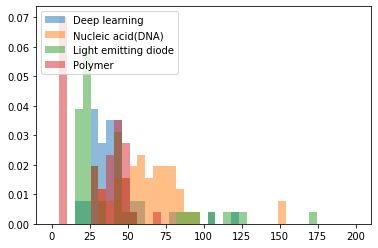

In [148]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df['Target']=='Deep learning']['Title_len'], bins, alpha=0.5, normed=True, label='Deep learning')
plt.hist(df[df['Target']=='Nucleic acid(DNA)']['Title_len'], bins, alpha=0.5, normed=True, label='Nucleic acid(DNA)')
plt.hist(df[df['Target']=='Light emitting diode']['Title_len'], bins, alpha=0.5, normed=True, label='Light emitting diode')
plt.hist(df[df['Target']=='Polymer']['Title_len'], bins, alpha=0.5, normed=True, label='Polymer')
plt.legend(loc='upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The '

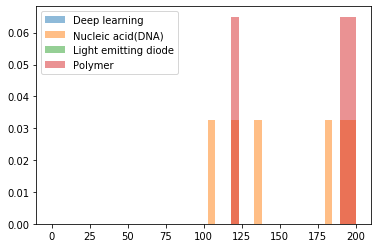

In [149]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df['Target']=='Deep learning']['Abstract_len'], bins, alpha=0.5, normed=True, label='Deep learning')
plt.hist(df[df['Target']=='Nucleic acid(DNA)']['Abstract_len'], bins, alpha=0.5, normed=True, label='Nucleic acid(DNA)')
plt.hist(df[df['Target']=='Light emitting diode']['Abstract_len'], bins, alpha=0.5, normed=True, label='Light emitting diode')
plt.hist(df[df['Target']=='Polymer']['Abstract_len'], bins, alpha=0.5, normed=True, label='Polymer')
plt.legend(loc='upper left')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


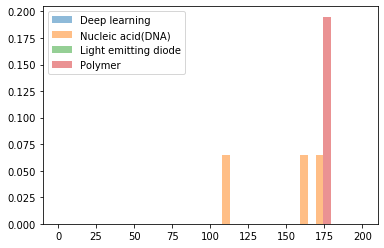

In [150]:
bins = np.linspace(0, 200, 40)

plt.hist(df[df['Target']=='Deep learning']['First Claim_len'], bins, alpha=0.5, normed=True, label='Deep learning')
plt.hist(df[df['Target']=='Nucleic acid(DNA)']['First Claim_len'], bins, alpha=0.5, normed=True, label='Nucleic acid(DNA)')
plt.hist(df[df['Target']=='Light emitting diode']['First Claim_len'], bins, alpha=0.5, normed=True, label='Light emitting diode')
plt.hist(df[df['Target']=='Polymer']['First Claim_len'], bins, alpha=0.5, normed=True, label='Polymer')
plt.legend(loc='upper left')
plt.show()

In [151]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [152]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Title'])
X_tfidf_feat = pd.concat([data['Title_len'], data['punct%_Title'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [153]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Abstract'])
X_tfidf_feat = pd.concat([data['Abstract_len'], data['punct%_Abstract'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [154]:
# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['First Claim'])
X_tfidf_feat = pd.concat([data['First Claim_len'], data['punct%_First Claim'], pd.DataFrame(X_tfidf.toarray())], axis=1)

In [155]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)# n_jobs=-1 for parallelizing search
gs_fit = gs.fit(X_tfidf_feat, data['Target'])

pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7,0.405894,0.007648,0.022191,0.007415,90,150,"{'max_depth': 90, 'n_estimators': 150}",1.0,1.000,1.0,1.0,1.0,1.000,0.00,1
11,0.682316,0.088722,0.037684,0.007665,None,300,"{'max_depth': None, 'n_estimators': 300}",1.0,0.975,1.0,1.0,1.0,0.995,0.01,2
2,0.774312,0.016000,0.043995,0.006388,30,300,"{'max_depth': 30, 'n_estimators': 300}",1.0,0.950,1.0,1.0,1.0,0.990,0.02,3
4,0.387464,0.006420,0.029135,0.002581,60,150,"{'max_depth': 60, 'n_estimators': 150}",1.0,0.950,1.0,1.0,1.0,0.990,0.02,3
5,0.758597,0.030002,0.044242,0.006525,60,300,"{'max_depth': 60, 'n_estimators': 300}",1.0,0.950,1.0,1.0,1.0,0.990,0.02,3


In [156]:
X_tfidf_feat.shape

(200, 2247)

In [157]:
data['Target'].shape

(200,)

In [158]:
from sklearn.model_selection import train_test_split

X = X_tfidf_feat
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [159]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
rf = RandomForestClassifier(n_estimators=300, max_depth=90, n_jobs=-1)

rf_tdidf = rf.fit(X_train, y_train)

y_pred = rf_tdidf.predict(X_test)


In [163]:
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

       Deep learning       1.00      1.00      1.00         6
Light emitting diode       1.00      1.00      1.00         9
   Nucleic acid(DNA)       1.00      1.00      1.00        15
             Polymer       1.00      1.00      1.00        10

            accuracy                           1.00        40
           macro avg       1.00      1.00      1.00        40
        weighted avg       1.00      1.00      1.00        40



In [164]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 6,  0,  0,  0],
       [ 0,  9,  0,  0],
       [ 0,  0, 15,  0],
       [ 0,  0,  0, 10]], dtype=int64)

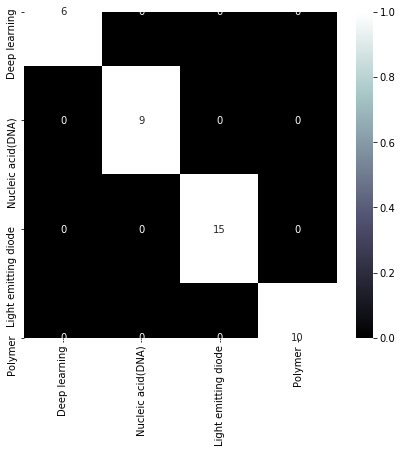

In [165]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

plot_confusion_matrix(cm, ['Deep learning', 'Nucleic acid(DNA)', 'Light emitting diode', 'Polymer'])